<a href="https://colab.research.google.com/github/fayashi06/Decision-Tree/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify = y)


In [5]:
model = DecisionTreeClassifier(
    max_depth = 3,
    random_state = 42
)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
model.score(  X_train, y_train)

0.9833333333333333

In [7]:
model.score(  X_test, y_test)

0.9666666666666667

In [10]:
y_pred = model.predict(X_test)

Text(95.72222222222221, 0.5, 'Truth')

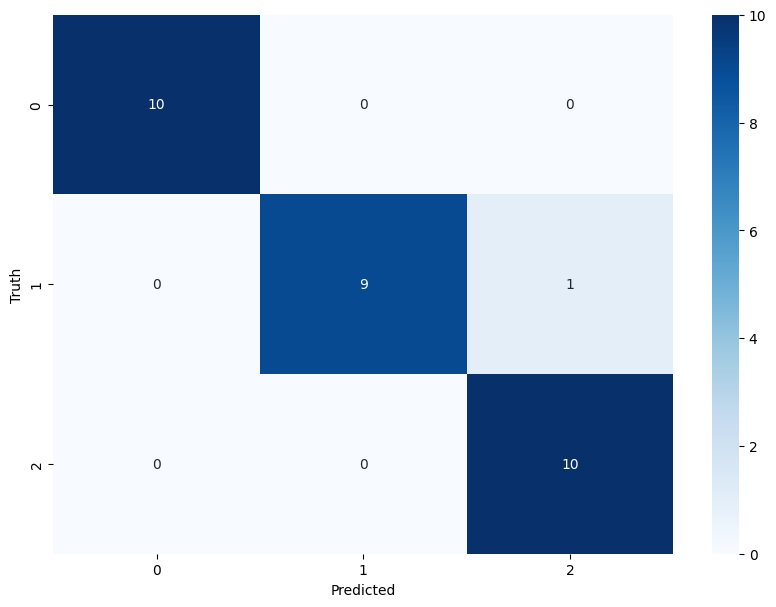

In [11]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [12]:
data = load_iris(as_frame = True) # data frame kimi gormek ucun istf olunur
df = data['data'] # 4 5 6 7 8
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


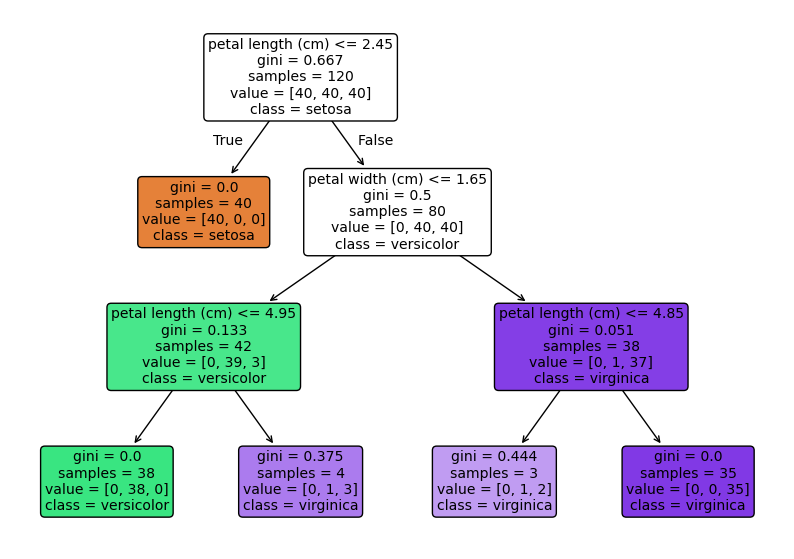

In [13]:
plt.figure(figsize = (10,7))
plot_tree(model,feature_names=iris.feature_names,class_names = iris.target_names,filled = True,rounded = True)
plt.show()

In [14]:
!unzip archive.zip

Archive:  archive.zip
  inflating: housing.csv             


In [16]:
df = pd.read_csv('/content/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [17]:
X = df.drop(columns = ['median_house_value'],axis = 1)
y = df['median_house_value'].copy()

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
#ilk once regression edirik

In [19]:
num_feature = X_train.select_dtypes(include = np.number).columns
cat_feature = X_train.select_dtypes(exclude = np.number).columns

In [20]:
cat_feature

Index(['ocean_proximity'], dtype='object')

In [49]:
num_pipeline = Pipeline([
    ('inpute',SimpleImputer(strategy = 'mean'))
])
cat_pipeline = Pipeline([
    ('inpute',SimpleImputer(strategy = 'constant')),
    ('encode',OneHotEncoder(handle_unknown='ignore'))

])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_feature),
    ('cat', cat_pipeline, cat_feature)
], remainder='passthrough')

model = DecisionTreeRegressor(
    max_depth = 10,
    min_samples_split = 17,
    min_samples_leaf = 28,
    random_state = 42
)
full_pipeline = Pipeline([
    ('transformer', transformer),
    ('estimator',model)
])
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('estimator',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=28,
                                       min_samples_split=17,
                                       random_state=42))])

In [50]:
full_pipeline.score(X_train,y_train)

0.77553586026993

In [52]:
full_pipeline.score(X_test,y_test)

0.721115586495524

In [53]:
y_pred = full_pipeline.predict(X_test)

In [54]:
r2 = r2_score(y_test,y_pred)
r2

0.721115586495524

In [55]:
mse = mean_squared_error(y_test, y_pred)
mse

3654526393.4771304

In [60]:
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
rmse

np.float64(60452.67896030027)

In [63]:
feature_importance = full_pipeline.named_steps['estimator'].feature_importances_
feature_names = full_pipeline.named_steps['transformer'].get_feature_names_out()
imp_df = pd.DataFrame({'feature': feature_names,'importance': feature_names}).sort_values('importance',ascending = False)
imp_df

,feature,importance
3,num__total_rooms,num__total_rooms
4,num__total_bedrooms,num__total_bedrooms
5,num__population,num__population
7,num__median_income,num__median_income
0,num__longitude,num__longitude
1,num__latitude,num__latitude
2,num__housing_median_age,num__housing_median_age
6,num__households,num__households
12,cat__ocean_proximity_NEAR OCEAN,cat__ocean_proximity_NEAR OCEAN
11,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR BAY
